In [17]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import utils
import math

dataDir = "c:/Users/llave/Documents/CMS/data/electron_selection_compressed/"

In [127]:
nEMax0 = 0
e_max = np.zeros((40,40))
for file in os.listdir(dataDir):
    if("e_0p25"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['images'])>0): e_images = temp['images']
        
        # reshape images
        e_images = e_images[:,1:]
        if(e_images.shape[1] != 6400):
            print(file)
            continue
        e_images = np.reshape(e_images,(e_images.shape[0],40,40,4))
        e_images = e_images[:,:,:,0]
        
        # store indices for max of each ECAL image
        for img in e_images:
            if(img.max()!=0): 
                indices = np.where(img == img.max())
                e_max[indices]+=1
            else:
                nEMax0+=1

e_0p25_1131.npz
e_0p25_17.npz
e_0p25_2222.npz
e_0p25_2893.npz
e_0p25_87.npz


Number of max=0 events: 125
Number of events in image: 17669.0


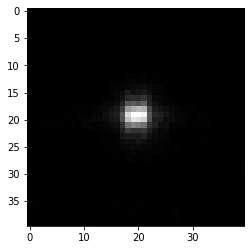

In [95]:
%matplotlib inline
print("Number of max=0 events:",nEMax0)
print("Number of events in image:",np.sum(e_max))
plt.imshow(e_max,cmap='gray')

In [62]:
nSaved = 0
nBkgMax0 = 0
bkg_max = np.zeros((40,40))
for file in os.listdir(dataDir):
    if("bkg_"in file and ".npz" in file):
        
        # load images from file
        temp = np.load(dataDir+file)
        if(len(temp['images'])>0): bkg_images = temp['images']
            
        # reshape images
        bkg_images = bkg_images[:,1:]
        bkg_images = np.reshape(bkg_images,(bkg_images.shape[0],40,40,4))
        bkg_images = bkg_images[:,:,:,0]
        
        # store indices for max of each ECAL image
        for img in bkg_images:
            if(img.max()!=0): 
                indices = np.where(img == img.max())
                bkg_max[indices]+=1
            else:
                nBkgMax0+=1
        
        nSaved += 1
        if(nSaved == 500): break

Number of max=0 events: 363902
Number of events in image: 1528403.0


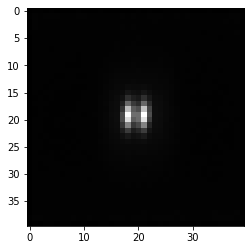

In [63]:
%matplotlib inline
print("Number of max=0 events:",nBkgMax0)
print("Number of events in image:",np.sum(bkg_max))
plt.imshow(bkg_max,cmap='gray')

In [197]:
veti,bkg_failVeto,bkg_passVeto=[],[],[]
e_failVeto,e_passVeto=[],[]
for i,veto in enumerate(np.arange(0,30)):
    tempFail, tempPass = 0,0
    for iRow, row in enumerate(bkg_max):
        for iCol,pixel in enumerate(row):
            if(math.sqrt(pow(iRow-19.5,2)+pow(iCol-19.5,2)) < veto):
                tempPass+=pixel
            else:
                tempFail+=pixel
    veti.append(veto)
    bkg_failVeto.append(tempFail)
    bkg_passVeto.append(tempPass)
    
    tempFail, tempPass = 0,0
    for iRow, row in enumerate(e_max):
        for iCol,pixel in enumerate(row):
            if(math.sqrt(pow(iRow-19.5,2)+pow(iCol-19.5,2)) < veto):
                tempPass+=pixel
            else:
                tempFail+=pixel
    e_failVeto.append(tempFail)
    e_passVeto.append(tempPass)

In [218]:
np.save("e_max",e_max)
np.save("bkg_max",bkg_max)

In [200]:
f_bkg_failVeto = bkg_failVeto/np.sum(bkg_max)
f_bkg_passVeto = bkg_passVeto/np.sum(bkg_max)
f_e_failVeto = e_failVeto/np.sum(e_max)
f_e_passVeto = e_passVeto/np.sum(e_max)

NameError: name 'f_bkg_dist' is not defined

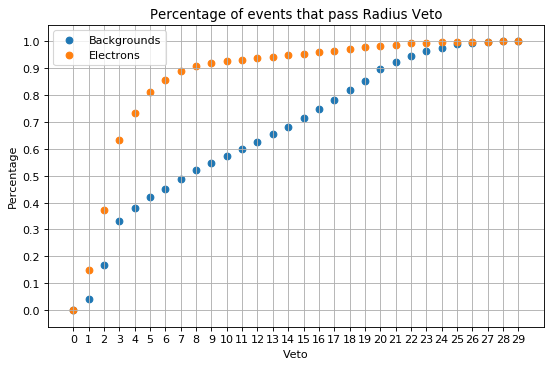

In [199]:
#plt.scatter(veti, bkg_failVeto, label="Backgrounds that fail the Veto")
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(veti, f_bkg_passVeto, label="Backgrounds")
#plt.scatter(veti, e_failVeto, label="Electrons that fail the Veto")
plt.scatter(veti, f_e_passVeto, label="Electrons")
plt.title("Percentage of events that pass Radius Veto")
plt.xlabel("Veto")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,30,1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid(True)
plt.legend()

In [187]:
nTotE = nEMax0 + np.sum(e_max)
print(nEMax0*1.0/nTotE, nEMax0)
print(f_e_failVeto[20], e_failVeto[20])

0.007024839833651793 125
0.015054615428151 266.0


In [188]:
nTotBkg = nBkgMax0 + np.sum(bkg_max)
print(nBkgMax0*1.0/nTotBkg, nBkgMax0)
print(f_bkg_failVeto[20], bkg_failVeto[20])

0.1923062085657439 363902
0.10190309754691662 155749.0


In [213]:
f_bkg_dist = []
for i in range(len(f_bkg_passVeto)):
    if(i==0): f_bkg_dist.append(f_bkg_passVeto[i])
    else:
        prev = f_bkg_passVeto[i-1]
        curr = f_bkg_passVeto[i]
        f_bkg_dist.append(curr-prev)
f_e_dist = []
for i in range(len(f_e_passVeto)):
    if(i==0): f_e_dist.append(f_e_passVeto[i])
    else:
        prev = f_e_passVeto[i-1]
        curr = f_e_passVeto[i]
        f_e_dist.append(curr-prev)

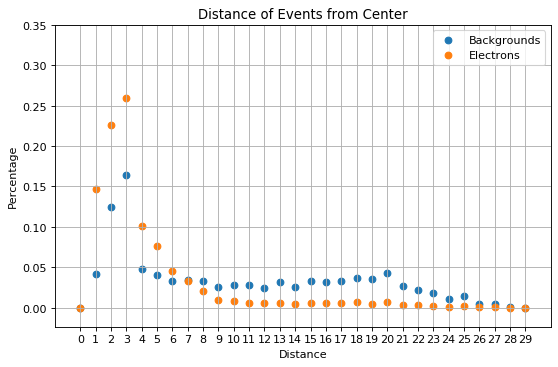

In [217]:
#plt.scatter(veti, bkg_failVeto, label="Backgrounds that fail the Veto")
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(veti, f_bkg_dist, label="Backgrounds")
#plt.scatter(veti, e_failVeto, label="Electrons that fail the Veto")
plt.scatter(veti, f_e_dist, label="Electrons")
plt.title("Distance of Events from Center")
plt.xlabel("Distance")
plt.ylabel("Percentage")
plt.xticks(np.arange(0,30,1))
plt.yticks(np.arange(0,0.4,0.05))
plt.grid(True)
plt.legend()